# <center>Leading Club Classification</center>

## Modules

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set display options to show all content
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.read_csv('info.csv')

,LoanStatNew,Description
0,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if the loan originates.
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when applying for the loan.*
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
9,annual_inc,The self-reported annual income provided by the borrower during registration.


## Initialize the dataframe

In [3]:
df = pd.read_csv('data.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [5]:
pd.DataFrame({'Unique Values': df.nunique(), 'Data Types': df.dtypes})
pd.DataFrame({'Column Name': df.columns, 'Unique Values': df.nunique(), 'Data Types': df.dtypes}).reset_index(drop=True)

,Column Name,Unique Values,Data Types
0,loan_amnt,1397,float64
1,term,2,object
2,int_rate,566,float64
3,installment,55706,float64
4,grade,7,object
5,sub_grade,35,object
6,emp_title,173105,object
7,emp_length,11,object
8,home_ownership,6,object
9,annual_inc,27197,float64


## Exploratory Data Analysis

In [6]:
features = ['term', 'home_ownership', 'verification_status', 'initial_list_status', 'application_type', 'pub_rec_bankruptcies']

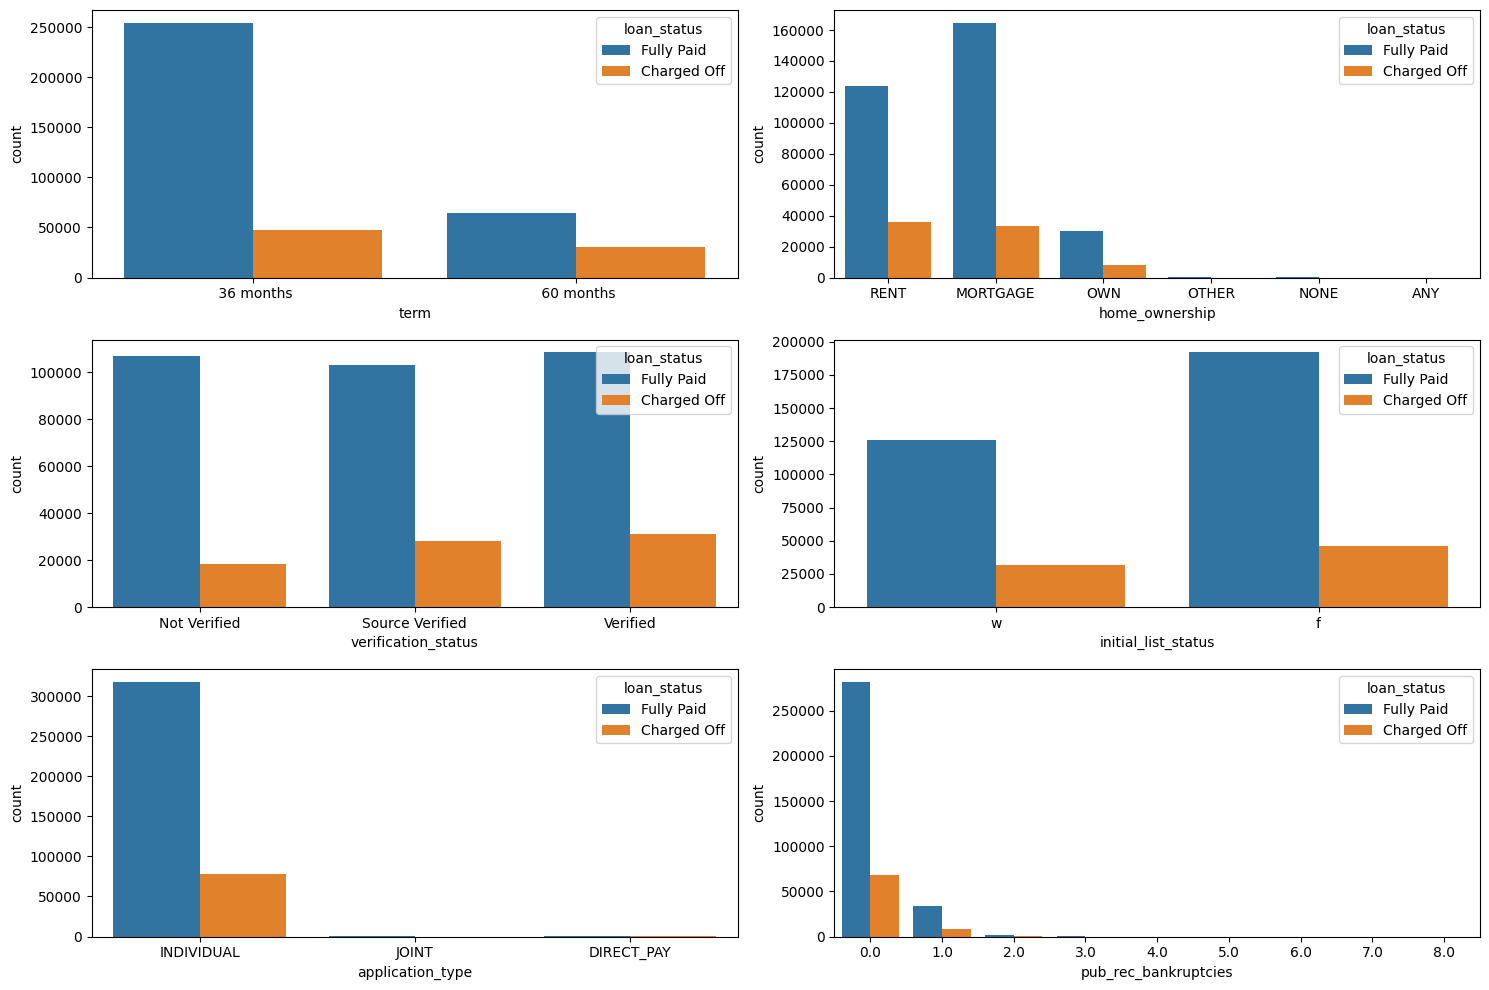

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    sns.countplot(data=df, x=feature, hue='loan_status', ax=ax)

plt.tight_layout()
plt.show()

## Data Wrangling

In [8]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

**Cleaning 'emp_length' column**

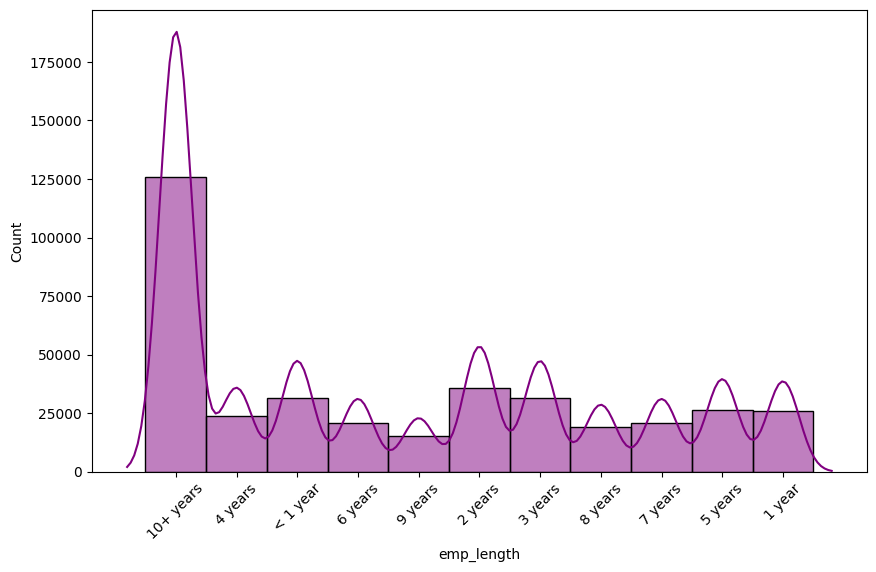

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['emp_length'], kde=True, kde_kws=dict(cut=3), color='purple')
plt.xticks(rotation=45)
plt.show()

In [10]:
df['emp_length'].fillna(0, inplace=True)
df['emp_length'].replace({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, 
                         '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}, inplace=True)

**Cleaning 'revol_util' column**

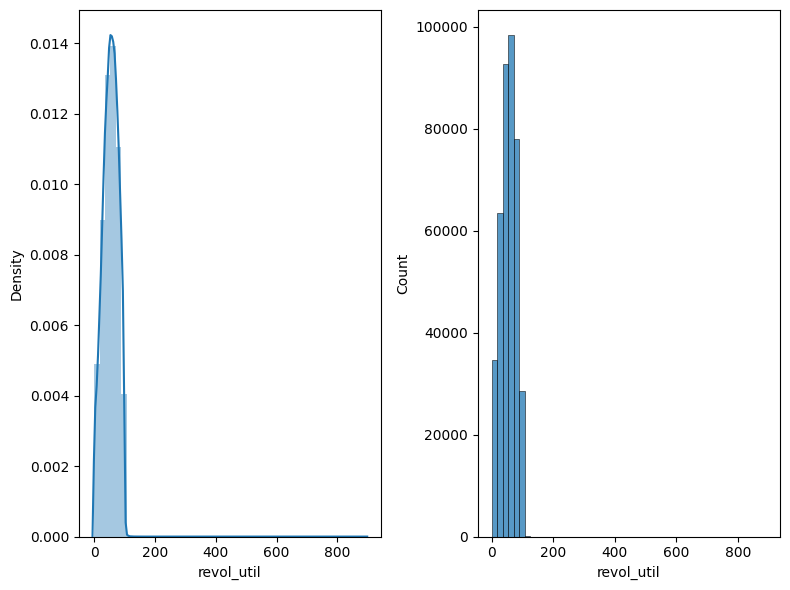

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

ax1, ax2 = axes.flatten()

sns.distplot(df['revol_util'], ax=ax1)
sns.histplot(df['revol_util'], ax=ax2, bins=50)

plt.tight_layout()
plt.show()

In [12]:
df['revol_util'].describe()

count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64

In [13]:
df['revol_util'].sort_values(ascending=False)

137211    892.3
329037    153.0
82600     152.5
65687     150.7
350333    148.0
          ...  
385222      NaN
388426      NaN
390665      NaN
395088      NaN
395665      NaN
Name: revol_util, Length: 396030, dtype: float64

In [14]:
df = df[df['revol_util'] < df['revol_util'].max()]

In [15]:
df['revol_util'].sort_values(ascending=False)

329037    153.0
82600     152.5
65687     150.7
350333    148.0
165111    146.1
          ...  
237946      0.0
362149      0.0
104076      0.0
337027      0.0
178370      0.0
Name: revol_util, Length: 395753, dtype: float64

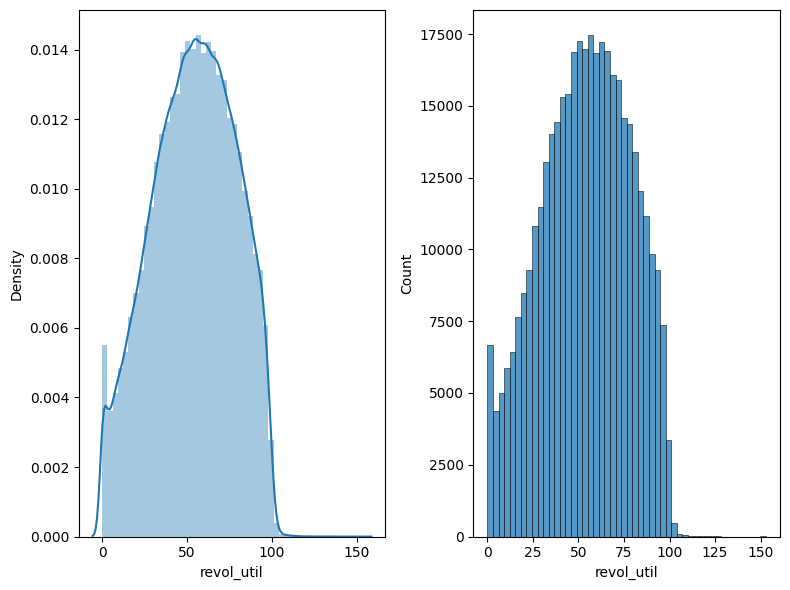

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

ax1, ax2 = axes.flatten()

sns.distplot(df['revol_util'], ax=ax1)
sns.histplot(df['revol_util'], ax=ax2, bins=50)

plt.tight_layout()
plt.show()

In [17]:
df['revol_util'].fillna(df['revol_util'].mean(), inplace=True)

**Cleaning 'mort_acc' column**

In [18]:
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [19]:
df['mort_acc'].describe()

count    358013.000000
mean          1.813797
std           2.147898
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

In [20]:
df['mort_acc'].value_counts()

mort_acc
0.0     139707
1.0      60384
2.0      49907
3.0      38022
4.0      27865
5.0      18182
6.0      11059
7.0       6050
8.0       3120
9.0       1653
10.0       863
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [21]:
df['mort_acc'].fillna(0, inplace=True)

**Cleaning 'pub_rec_bankruptcies' column**

In [22]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.])

In [23]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    350107
1.0     42786
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

In [24]:
df['pub_rec_bankruptcies'].describe()

count    395218.000000
mean          0.121723
std           0.356274
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64

In [25]:
df['pub_rec_bankruptcies'].fillna(0, inplace=True)

**Cleaning 'title' & 'emp_title' columns**

In [26]:
df['title'].nunique(), df['emp_title'].nunique(), df['address'].nunique()

(48766, 172988, 393425)

Since these columns are of object datatype and have high number of unique values, lets drop them completely instead of encoding them.

In [27]:
df.drop(columns=['title', 'emp_title', 'address'], inplace=True)

In [28]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

## Feature Engineering

In [29]:
encoder = LabelEncoder()

**Converting 'issue_d' column to datetime and assigning seperate columns for year and month**

In [30]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

**Converting 'earliest_cr_line' column to datetime and assigning seperate columns for year and month**

In [31]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['earliest_cr_year'] = df['earliest_cr_line'].dt.year
df['earliest_cr_month'] = df['earliest_cr_line'].dt.month

In [32]:
df.drop(columns=['issue_d', 'earliest_cr_line'], inplace=True)

**Converting 'term' column to numeric datatype**

In [33]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [34]:
df['term'].replace({' 36 months': 0, ' 60 months': 1}, inplace=True)

**Converting 'grade' column to numeric datatype**

In [35]:
df['grade'] = encoder.fit_transform(df['grade'])

**Converting 'sub_grade' column to numeric datatype**

In [36]:
df['sub_grade'] = encoder.fit_transform(df['sub_grade'])

**Converting 'home_ownership' column to numeric datatype**

In [37]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [38]:
df['home_ownership'] = encoder.fit_transform(df['home_ownership'])

**Converting 'verification_status' column to numeric datatype**

In [39]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [40]:
df['verification_status'].replace({'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}, inplace=True)

**Converting 'loan_status' column to numeric datatype**

In [41]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [42]:
df['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0}, inplace=True)

**Converting 'purpose' column to numeric datatype**

In [43]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [44]:
df['purpose'] = encoder.fit_transform(df['purpose'])

**Converting 'initial_list_status' column to numeric datatype**

In [45]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [46]:
df['initial_list_status'] = encoder.fit_transform(df['initial_list_status'])

**Converting 'application_type' column to numeric datatype**

In [47]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [48]:
df['application_type'] = encoder.fit_transform(df['application_type'])

In [49]:
df.describe()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_year,earliest_cr_month
count,395753.000000,395753.000000,395753.000000,395753.000000,395753.000000,395753.000000,395753.000000,395753.000000,3.957530e+05,395753.000000,...,395753.000000,395753.000000,395753.000000,395753.000000,395753.000000,395753.000000,395753.000000,395753.000000,395753.000000,395753.000000
mean,14116.167534,0.237451,13.637966,431.911746,1.821828,11.080980,5.664326,2.900413,7.419437e+04,1.036513,...,53.789630,25.418509,0.398918,1.000351,1.640829,0.121558,2013.629410,6.553239,1997.857815,6.755979
std,8356.236098,0.425522,4.472024,250.687117,1.333651,6.600124,3.772353,1.924290,6.162365e+04,0.816635,...,24.415869,11.886759,0.489676,0.042385,2.111238,0.356061,1.481307,3.426650,7.199223,3.435031
min,500.000000,0.000000,5.320000,16.080000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1.000000,1944.000000,1.000000
25%,8000.000000,0.000000,10.490000,250.330000,1.000000,6.000000,2.000000,1.000000,4.500000e+04,0.000000,...,35.800000,17.000000,0.000000,1.000000,0.000000,0.000000,2013.000000,4.000000,1994.000000,4.000000
50%,12000.000000,0.000000,13.330000,375.430000,2.000000,10.000000,6.000000,1.000000,6.400000e+04,1.000000,...,54.800000,24.000000,0.000000,1.000000,1.000000,0.000000,2014.000000,7.000000,1999.000000,7.000000
75%,20000.000000,0.000000,16.490000,567.460000,3.000000,15.000000,10.000000,5.000000,9.000000e+04,2.000000,...,72.900000,32.000000,1.000000,1.000000,3.000000,0.000000,2015.000000,10.000000,2003.000000,10.000000
max,40000.000000,1.000000,30.990000,1533.810000,6.000000,34.000000,10.000000,5.000000,8.706582e+06,2.000000,...,153.000000,151.000000,1.000000,2.000000,34.000000,8.000000,2016.000000,12.000000,2013.000000,12.000000


In [50]:
df.dtypes

loan_amnt               float64
term                      int64
int_rate                float64
installment             float64
grade                     int32
sub_grade                 int32
emp_length                int64
home_ownership            int32
annual_inc              float64
verification_status       int64
loan_status               int64
purpose                   int32
dti                     float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status       int32
application_type          int32
mort_acc                float64
pub_rec_bankruptcies    float64
issue_year                int32
issue_month               int32
earliest_cr_year          int32
earliest_cr_month         int32
dtype: object

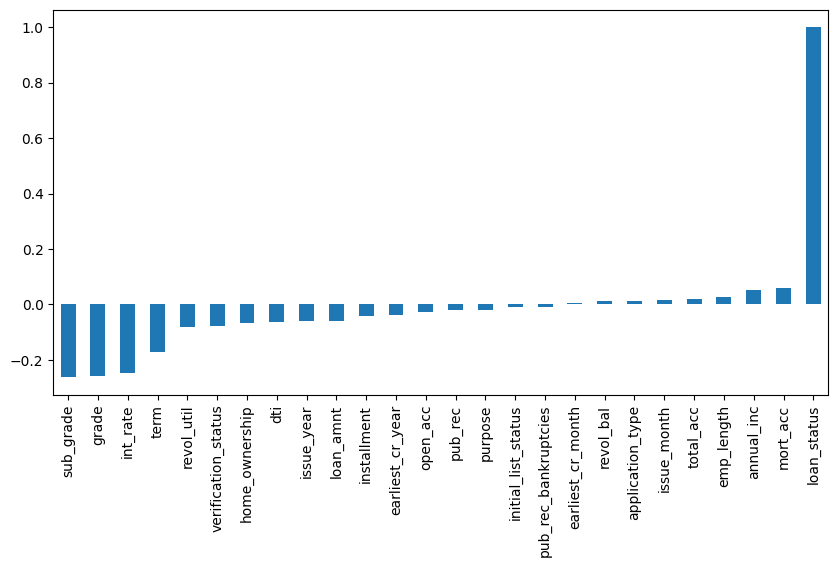

In [56]:
plt.figure(figsize=(10,5),dpi=100)
df.corr()['loan_status'].sort_values().plot(kind='bar')
plt.show()

## Model Training

In [51]:
X = df.drop('loan_status', axis=1).values
y = df['loan_status'].values

In [52]:
df.shape

(395753, 26)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

#### Scaling the features

In [54]:
scaler = MinMaxScaler()

In [55]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
model = Sequential()

model.add(Dense(units=78, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=39, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=19, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [69]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=True)

In [71]:
model.fit(x=X_train, y=y_train, epochs=100, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/100
1036/1036 [==============================] - 5s 5ms/step - loss: 0.4453 - val_loss: 0.4456
Epoch 2/100
1036/1036 [==============================] - 5s 4ms/step - loss: 0.4452 - val_loss: 0.4453
Epoch 3/100
1036/1036 [==============================] - 5s 5ms/step - loss: 0.4451 - val_loss: 0.4451
Epoch 4/100
1036/1036 [==============================] - 5s 4ms/step - loss: 0.4451 - val_loss: 0.4454
Epoch 5/100
1036/1036 [==============================] - 5s 4ms/step - loss: 0.4451 - val_loss: 0.4454
Epoch 6/100
1036/1036 [==============================] - 5s 4ms/step - loss: 0.4448 - val_loss: 0.4452
Epoch 7/100
1036/1036 [==============================] - 5s 5ms/step - loss: 0.4444 - val_loss: 0.4452
Epoch 8/100
1036/1036 [==============================] - 5s 4ms/step - loss: 0.4450 - val_loss: 0.4455
Epoch 9/100
1036/1036 [==============================] - 5s 4ms/step - loss: 0.4440 - val_loss: 0.4456
Epoch 10/100
1036/1036 [==============================] - 5s 4ms/step - l

Epoch 80/100
1036/1036 [==============================] - 5s 5ms/step - loss: 0.4410 - val_loss: 0.4444
Epoch 81/100
1036/1036 [==============================] - 5s 4ms/step - loss: 0.4417 - val_loss: 0.4436
Epoch 82/100
1036/1036 [==============================] - 5s 5ms/step - loss: 0.4411 - val_loss: 0.4436
Epoch 83/100
1036/1036 [==============================] - 5s 5ms/step - loss: 0.4411 - val_loss: 0.4432
Epoch 84/100
1036/1036 [==============================] - 5s 4ms/step - loss: 0.4419 - val_loss: 0.4434
Epoch 85/100
1036/1036 [==============================] - 5s 4ms/step - loss: 0.4412 - val_loss: 0.4444
Epoch 86/100
1036/1036 [==============================] - 5s 4ms/step - loss: 0.4412 - val_loss: 0.4432
Epoch 87/100
1036/1036 [==============================] - 5s 4ms/step - loss: 0.4411 - val_loss: 0.4434
Epoch 88/100
1036/1036 [==============================] - 5s 4ms/step - loss: 0.4410 - val_loss: 0.4444
Epoch 89/100
1036/1036 [==============================] - 5s 4ms

## Evaluation

In [74]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,0.445273,0.445629
1,0.445183,0.445268
2,0.445055,0.445064
3,0.445116,0.445446
4,0.445126,0.445359


<Axes: >

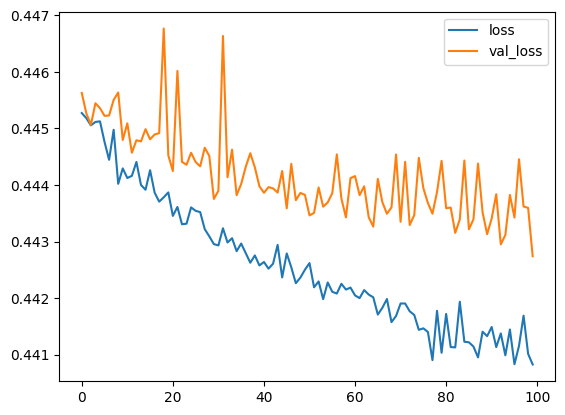

In [75]:
losses.plot()

In [77]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

4082/4082 [==============================] - 5s 1ms/step


In [79]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.56      0.09      0.15     25716
           1       0.81      0.98      0.89    104883

    accuracy                           0.81    130599
   macro avg       0.69      0.53      0.52    130599
weighted avg       0.77      0.81      0.74    130599



In [80]:
print(confusion_matrix(y_test, predictions))

[[  2198  23518]
 [  1699 103184]]


In [83]:
len(df[df['loan_status'] == 1]) / len(df)

0.8038928321453027

The model accuracy score is 81% and if we take a random guess, the chances of it being correct is 80%.  
We might as well take a guess instead of relying on this model.  